In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('fraudTest.csv')

# Inspect the dataset
print(df.head())



   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fraudTest.csv')

# Display the column names to identify the correct name for the class label
print("Columns in the dataset:", df.columns)

# Use the correct column name for the class label
class_column = 'is_fraud'

# Check the class distribution
fraud_count = df[class_column].value_counts()

print("Total transactions:\n", fraud_count)
print("\nNumber of fraudulent transactions: ", fraud_count[1])
print("Number of non-fraudulent transactions: ", fraud_count[0])




Columns in the dataset: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Total transactions:
 is_fraud
0    553574
1      2145
Name: count, dtype: int64

Number of fraudulent transactions:  2145
Number of non-fraudulent transactions:  553574


In [7]:

# Check for missing values
missing_values = df.isnull().sum()

# Print the columns with missing values and the count of missing values
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

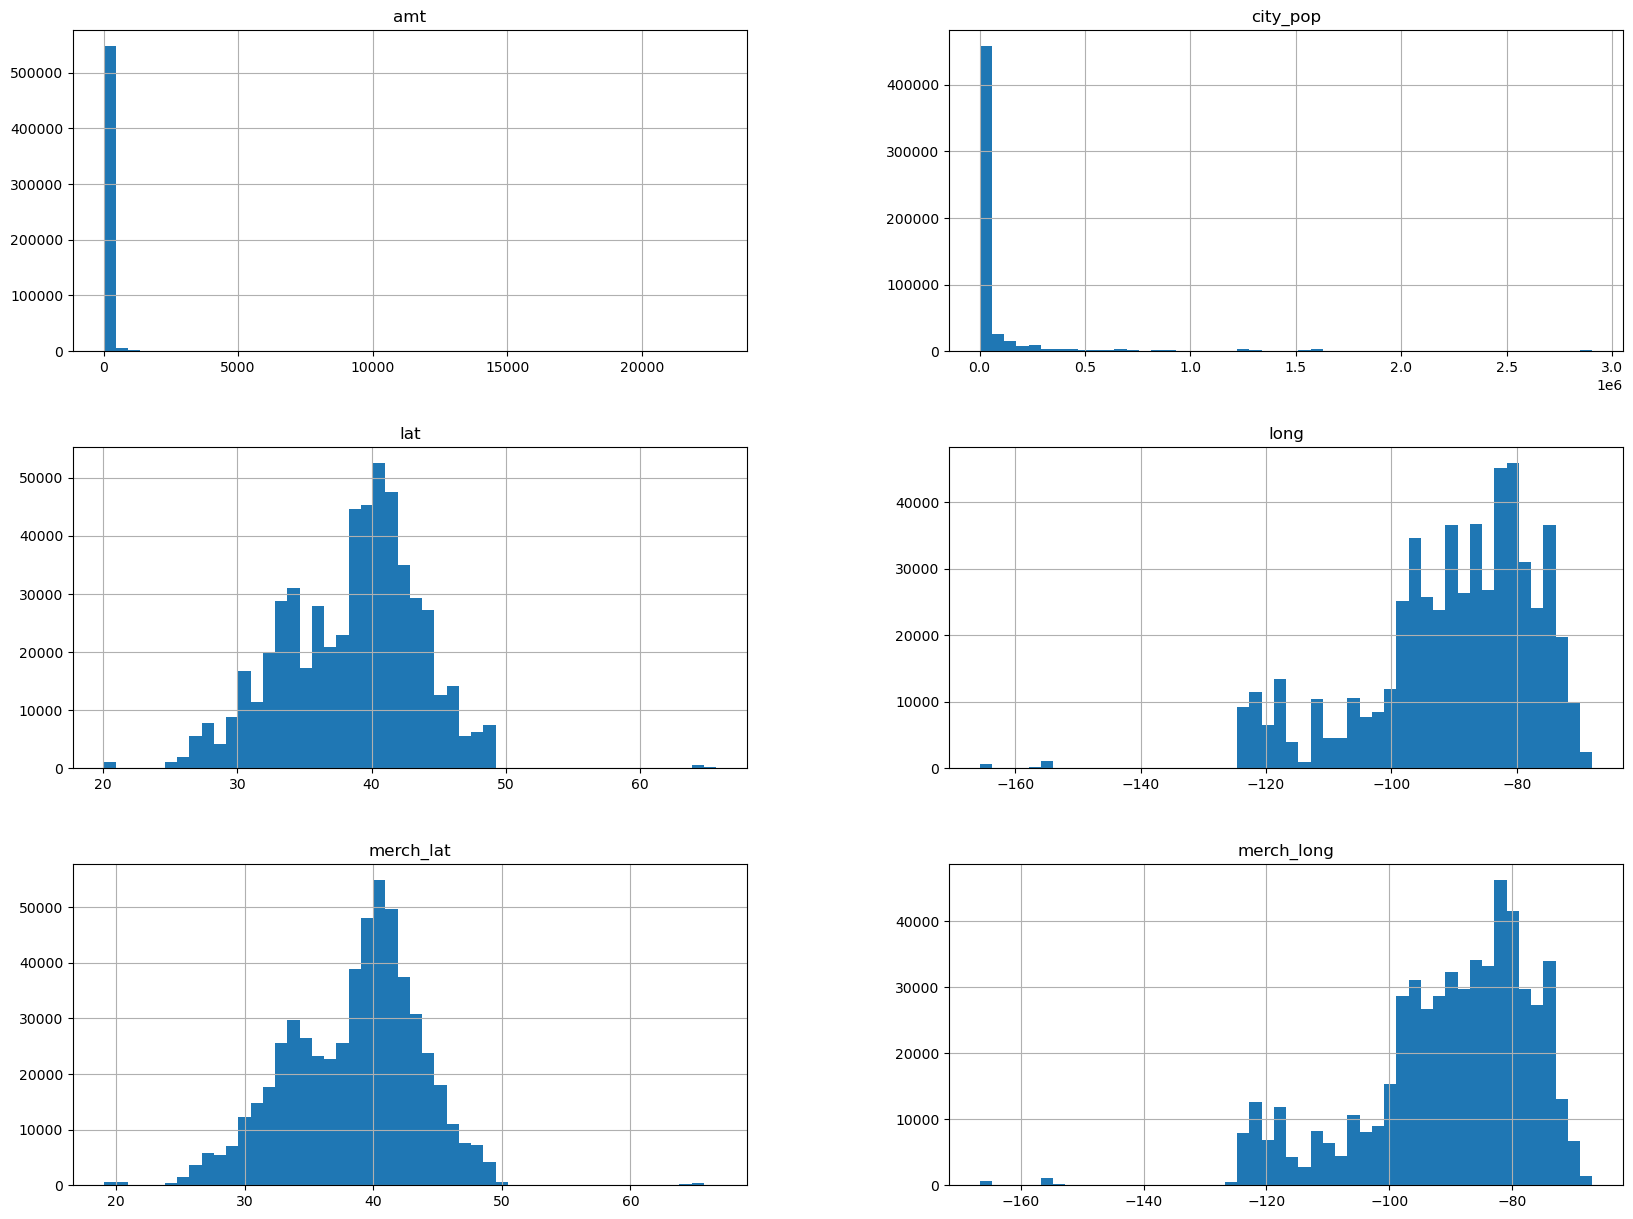

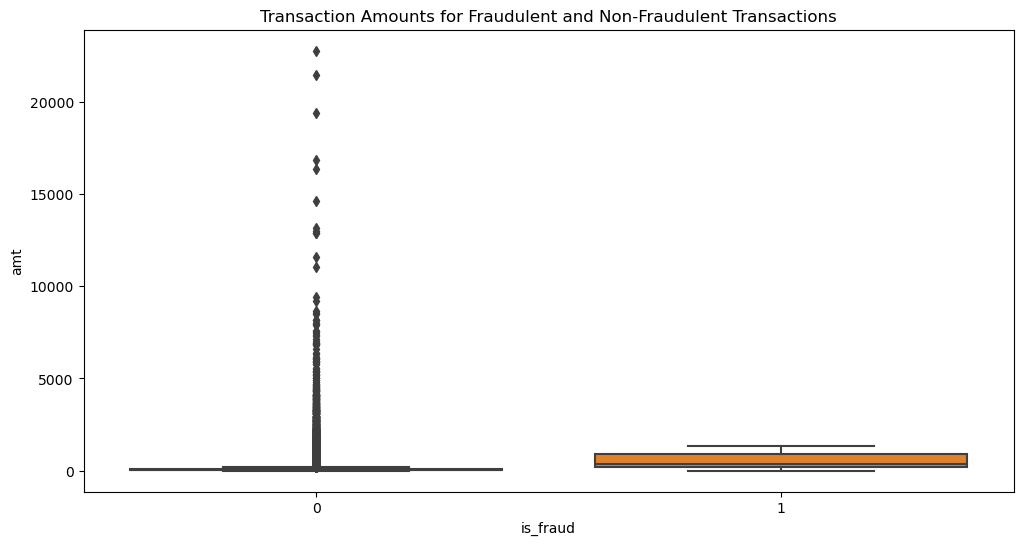

ValueError: could not convert string to float: '2020-06-21 12:14:25'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fraudTest.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Descriptive statistics
print(df.describe())

# Separate fraudulent and non-fraudulent transactions
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0]

# Histograms for numerical features
numerical_features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
df[numerical_features].hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots to compare fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot: Transaction amount vs. Transaction time (if available)
plt.figure(figsize=(10, 6))
plt.scatter(fraud['unix_time'], fraud['amt'], color='red', label='Fraud')
plt.scatter(non_fraud['unix_time'], non_fraud['amt'], color='blue', label='Non-Fraud')
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.title('Transaction Amount vs. Transaction Time')
plt.show()


Categories with the highest number of fraudulent transactions:
 category
shopping_net      506
grocery_pos       485
misc_net          267
shopping_pos      213
gas_transport     154
misc_pos           72
personal_care      70
home               67
kids_pets          65
entertainment      59
food_dining        54
health_fitness     52
grocery_net        41
travel             40
Name: is_fraud, dtype: int64


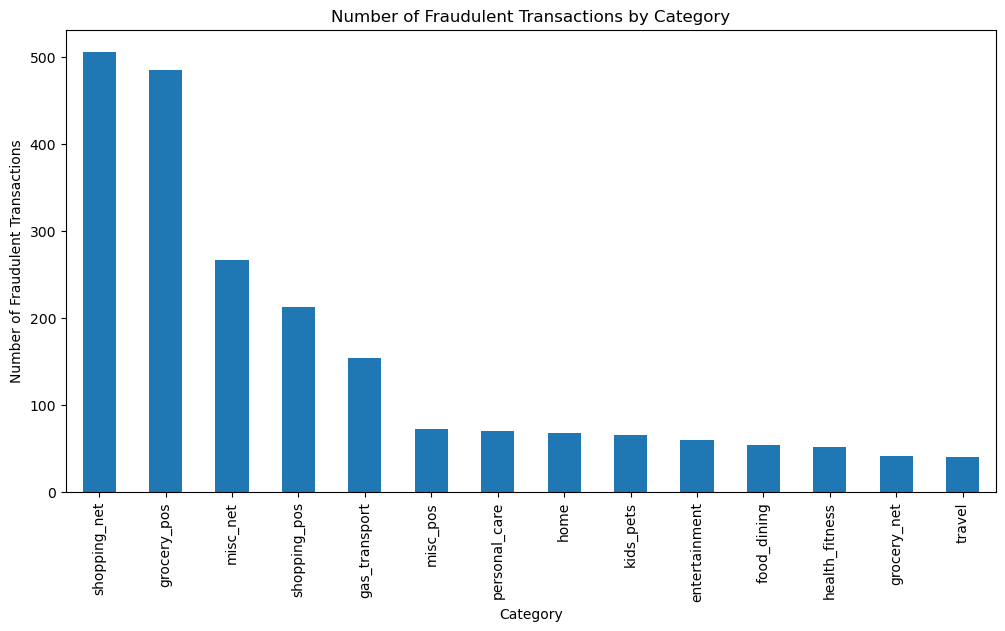

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fraudTest.csv')

# Group by 'category' and sum up the fraudulent transactions
fraud_by_category = df.groupby('category')['is_fraud'].sum().sort_values(ascending=False)

# Display the categories with the highest number of fraudulent transactions
print("Categories with the highest number of fraudulent transactions:\n", fraud_by_category)

# Optionally, visualize the top categories with the highest fraud counts
fraud_by_category.plot(kind='bar', figsize=(12, 6), title='Number of Fraudulent Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


Jobs with the highest fraud rate:
                                  fraud_rate
job                                        
Engineer, water                    1.000000
Operational investment banker      1.000000
Software engineer                  1.000000
Horticultural consultant           0.056338
Accountant, chartered certified    0.055300
...                                     ...
Futures trader                     0.000000
Furniture designer                 0.000000
Freight forwarder                  0.000000
Fitness centre manager             0.000000
Writer                             0.000000

[478 rows x 1 columns]


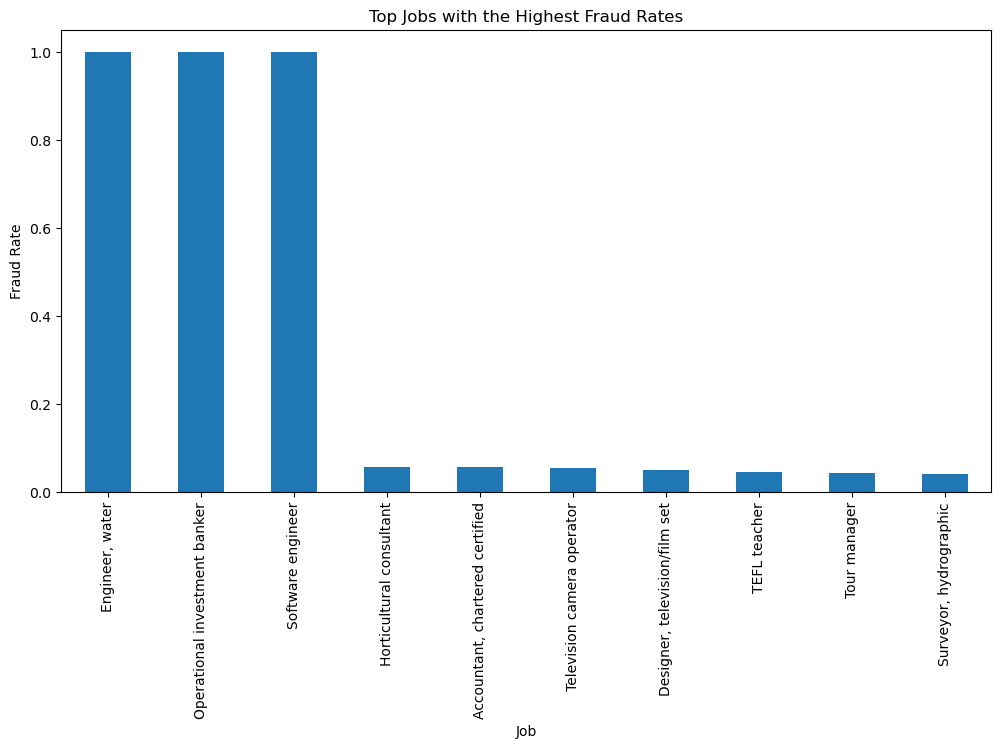

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fraudTest.csv')

# Group by 'job' and calculate the number of fraudulent transactions and total transactions for each job
fraud_by_job = df.groupby('job')['is_fraud'].agg(['sum', 'count'])

# Calculate the fraud rate
fraud_by_job['fraud_rate'] = fraud_by_job['sum'] / fraud_by_job['count']

# Sort by fraud rate in descending order
fraud_by_job_sorted = fraud_by_job.sort_values(by='fraud_rate', ascending=False)

# Display the jobs with the highest fraud rate
print("Jobs with the highest fraud rate:\n", fraud_by_job_sorted[['fraud_rate']])

# Optionally, visualize the top jobs with the highest fraud rates
fraud_by_job_sorted['fraud_rate'].head(10).plot(kind='bar', figsize=(12, 6), title='Top Jobs with the Highest Fraud Rates')
plt.xlabel('Job')
plt.ylabel('Fraud Rate')
plt.show()
